In [2]:
#Load the Data
import pandas as pd

# Load the dataset
file_path = 'election2024.csv'
election_data = pd.read_csv(file_path)

# Display the first few rows of the dataset
election_data.head()


,id,sex,age,federal_district,type_of_city,knows_election_date,will_vote,candidate,television_usage,internet_usage,education,income,employment,job_type,company_type,weight1
0,07169ed8148ce047,male,18.0,north caucasian,village,named correct date,not sure,Putin,several times a week,over 4 hours a day,incomplete school education,very high,entrepreneur,NaN,farming,1.445172
1,0716a4f3354cecdd,male,23.0,north caucasian,village,named correct date,not sure,Putin,once half a year,over 4 hours a day,college,very high,work for hire,commercial organization,trade,1.445172
2,0716889b304ce79c,male,20.0,volga,city with population of less than 50k,named correct date,definitely yes,Putin,several times a week,over 4 hours a day,college,very high,work for hire,law enforcement agency,law enforcement agency,1.301691
3,07168e28b5cce563,male,22.0,northwestern,city with population of 1 million and higher,not sure or no answer,not sure,Davankov,several times a week,over 4 hours a day,college,very high,unemployed,NaN,NaN,1.538628
4,0716a563914ce549,male,21.0,southern,city with population of 1 million and higher,named correct date,definitely yes,Putin,does not watch,over 4 hours a day,bachelor degree,very high,employed student,commercial organization,"tech, programming, communications",1.967015


In [3]:
#Check the Structure and Summary Statistics
# Check the structure of the dataset
election_data.info()

# Get summary statistics
election_data.describe(include='all')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600 entries, 0 to 1599
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   1600 non-null   object 
 1   sex                  1600 non-null   object 
 2   age                  1600 non-null   float64
 3   federal_district     1600 non-null   object 
 4   type_of_city         1600 non-null   object 
 5   knows_election_date  1600 non-null   object 
 6   will_vote            1600 non-null   object 
 7   candidate            1600 non-null   object 
 8   television_usage     1600 non-null   object 
 9   internet_usage       1600 non-null   object 
 10  education            1600 non-null   object 
 11  income               1600 non-null   object 
 12  employment           1600 non-null   object 
 13  job_type             692 non-null    object 
 14  company_type         879 non-null    object 
 15  weight1              1600 non-null   f

,id,sex,age,federal_district,type_of_city,knows_election_date,will_vote,candidate,television_usage,internet_usage,education,income,employment,job_type,company_type,weight1
count,1600,1600,1600.000000,1600,1600,1600,1600,1600,1600,1600,1600,1600,1600,692,879,1600.000000
unique,1600,2,NaN,8,7,4,6,7,6,6,6,6,11,6,21,NaN
top,07169ed8148ce047,female,NaN,central,city with population of 100-500k,named correct date,definitely yes,Putin,less than 4 hours a day,less than 4 hours a day,college,medium,work for hire,commercial organization,"industry, manufacturing",NaN
freq,1,843,NaN,425,391,1361,1062,1128,490,613,690,949,535,445,138,NaN
mean,NaN,NaN,49.936250,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000
std,NaN,NaN,16.901797,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.327084
min,NaN,NaN,18.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.468226
25%,NaN,NaN,37.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.772224
50%,NaN,NaN,49.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.921724
75%,NaN,NaN,64.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.158913


In [4]:
#Handle Missing Values
# Check missing values in 'job_type' and 'company_type'
missing_values = election_data[['job_type', 'company_type']].isnull().sum()
print(missing_values)


job_type        908
company_type    721
dtype: int64


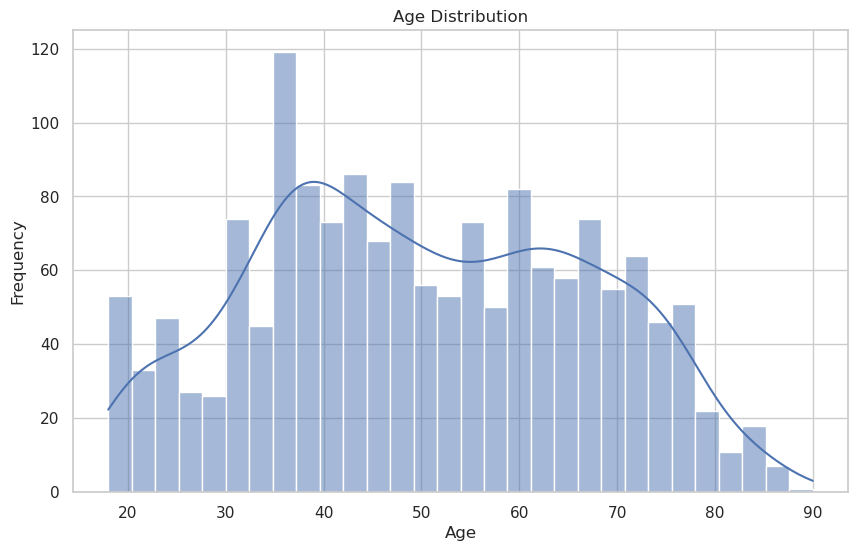

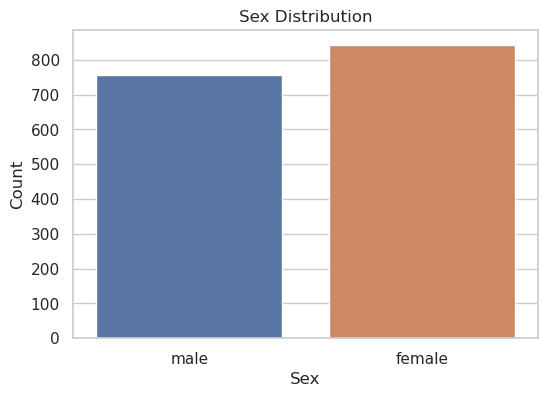

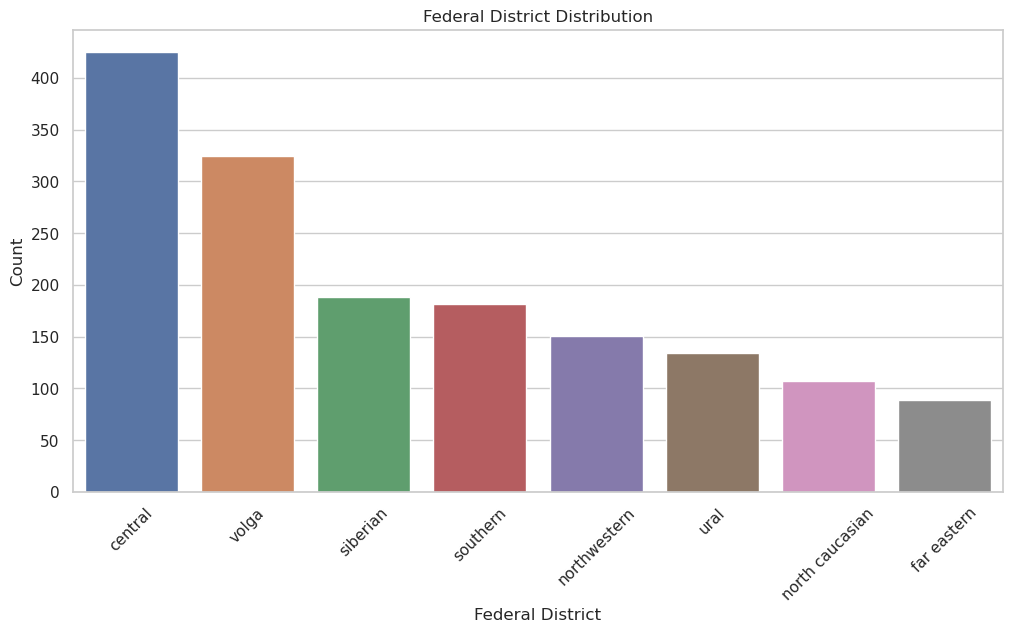

In [5]:
#Visualize Key Features
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style for the plots
sns.set(style="whitegrid")

# Plot the distribution of age
plt.figure(figsize=(10, 6))
sns.histplot(election_data['age'], bins=30, kde=True)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

# Plot the distribution of sex
plt.figure(figsize=(6, 4))
sns.countplot(x='sex', data=election_data)
plt.title('Sex Distribution')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.show()

# Plot the distribution of federal_district
plt.figure(figsize=(12, 6))
sns.countplot(x='federal_district', data=election_data, order=election_data['federal_district'].value_counts().index)
plt.title('Federal District Distribution')
plt.xlabel('Federal District')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


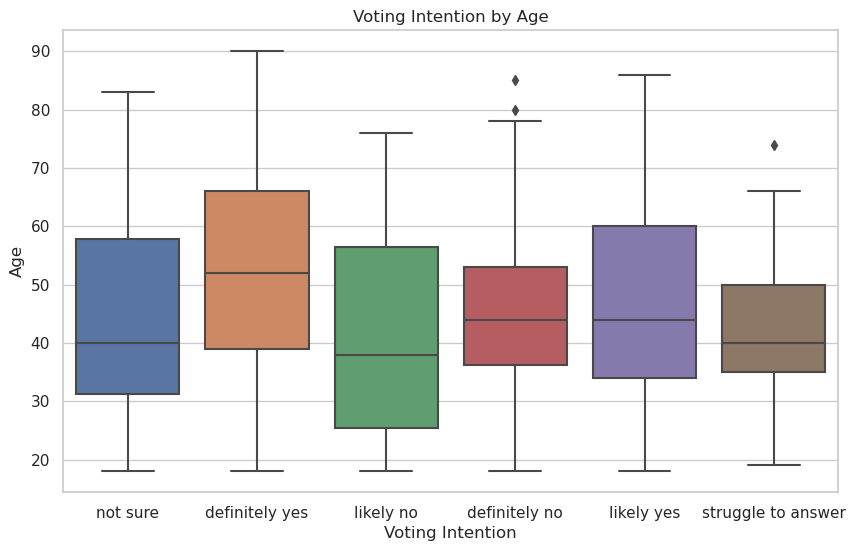

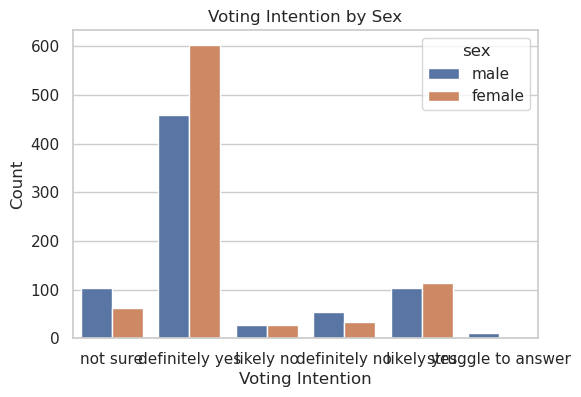

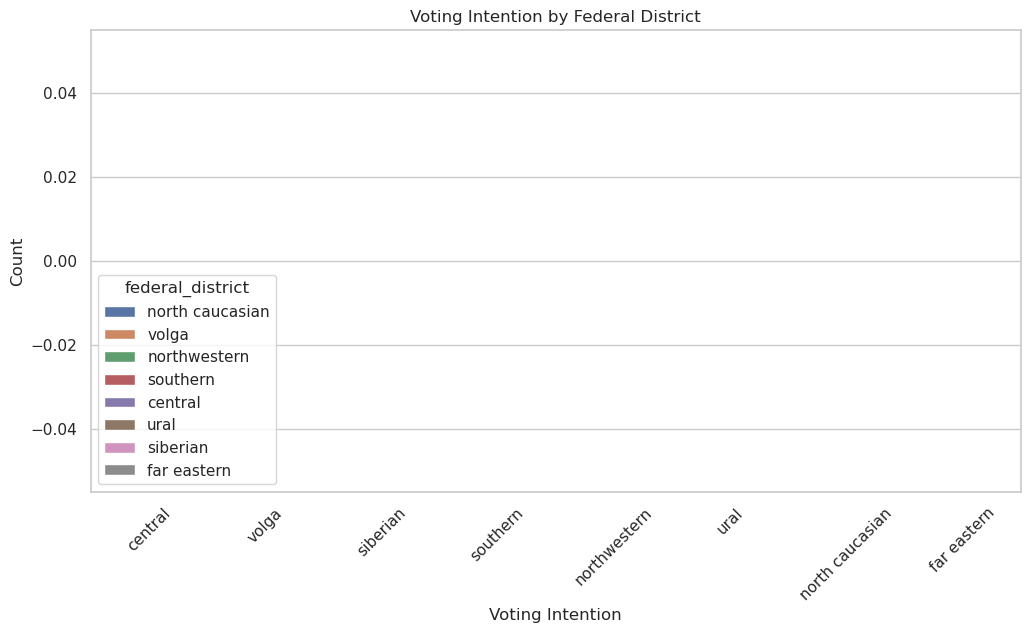

In [6]:
#Analyze Relationships
# Plot the relationship between 'will_vote' and 'age'
plt.figure(figsize=(10, 6))
sns.boxplot(x='will_vote', y='age', data=election_data)
plt.title('Voting Intention by Age')
plt.xlabel('Voting Intention')
plt.ylabel('Age')
plt.show()

# Plot the relationship between 'will_vote' and 'sex'
plt.figure(figsize=(6, 4))
sns.countplot(x='will_vote', hue='sex', data=election_data)
plt.title('Voting Intention by Sex')
plt.xlabel('Voting Intention')
plt.ylabel('Count')
plt.show()

# Plot the relationship between 'will_vote' and 'federal_district'
plt.figure(figsize=(12, 6))
sns.countplot(x='will_vote', hue='federal_district', data=election_data, order=election_data['federal_district'].value_counts().index)
plt.title('Voting Intention by Federal District')
plt.xlabel('Voting Intention')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()
